# 🎨 Basic Image Classification
## 🚙 Importing libraries, data sets, required files and modules

In [0]:
# import required libraries
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
import numpy as np

# import dataset
from tensorflow.keras.datasets import fashion_mnist as mnist

## ⏬ Data Loading
> 🎈 MNIST dataset is already splitted 
See labels [here](https://github.com/zalandoresearch/fashion-mnist#labels)

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### 🕵️‍♀️ Understand the data
- Get info about the shape, eng. training set has size of `(60000,28,28)`
- It contains 60,000 images in size of 28x28
- Grayscale

In [0]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# sample labels
print(y_train[0], y_train[1], y_train[2], y_train[3])

# map classes from numbers to words
classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)
9 0 0 3


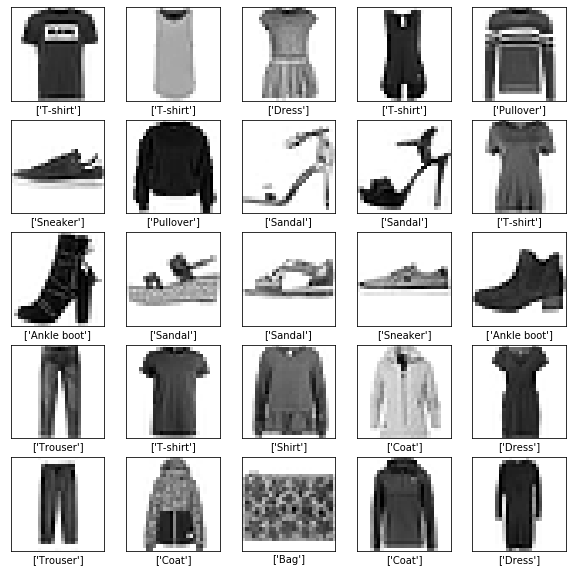

In [0]:
# explore some images
plt.figure(figsize=(10, 10))
for i in range(1, 26):
  plt.subplot(5, 5, i)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel([classes[y_train[i]]])
  plt.imshow(X_train[i], cmap=plt.cm.binary)

## 👩‍🔧 Data Preparation (pre-processing)

In [0]:
# apply data normalization
X_train, X_test = X_train / 255., X_test / 255. # keep values as floats

👩‍💻 Model Designing

### 🧱 Make layers design
- Number of layers and number of units in each layer
- Activation function of each layer

In [0]:
layers = [
          Flatten(input_shape = (28, 28)),
          Dense(128, activation = 'relu'),
          Dropout(0.2),
          Dense(10, activation = 'softmax')
        ]

### 🚀 Implement your design

In [0]:
# initialize the model
model = Sequential(layers)

# compile the model
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

## 🤓 Training
- Keras .fit() [details](https://keras.io/models/model/#fit)

In [0]:
model.fit(X_train, y_train, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.5306 - acc: 0.8117
Epoch 2/20
60000/60000 [==============================] - 4s 75us/sample - loss: 0.4025 - acc: 0.8543
Epoch 3/20
60000/60000 [==============================] - 4s 75us/sample - loss: 0.3660 - acc: 0.8662
Epoch 4/20
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3450 - acc: 0.8723
Epoch 5/20
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3302 - acc: 0.8785
Epoch 6/20
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3171 - acc: 0.8827
Epoch 7/20
60000/60000 [==============================] - 4s 75us/sample - loss: 0.3076 - acc: 0.8859
Epoch 8/20
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2976 - acc: 0.8887
Epoch 9/20
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2902 - acc: 0.8925
Epoch 10/20
60000/60000 [==============================] - 

## 👮‍♀️ Evaluate the model
- Keras .evaluate() [details](https://keras.io/models/model/#evaluate)

In [0]:
loss, acc = model.evaluate(X_test, y_test)
print('Accuracy', acc) 

10000/10000 [==============================] - 0s 35us/sample - loss: 0.3448 - acc: 0.8819
Accuracy 0.8819


## 🎉 Use the model to predict

In [0]:
# predict results of test set
preds = model.predict(X_test)

## 🤔 Understand Results

In [0]:
# print corresponded confidence of each class
print(preds[0])

[7.0443346e-11 5.7012521e-14 1.1008972e-11 1.1699554e-12 1.4678998e-13
 8.7935623e-04 7.1718230e-12 8.4279274e-04 2.9188475e-11 9.9827790e-01]


In [0]:
# get the highest value
print(max(preds[0]))

# get its index
print(np.argmax(preds[0]))

# get the correspnded class
print(classes[np.argmax(preds[0])])

0.9982779
9
Ankle boot


## 👀 Visualize Results

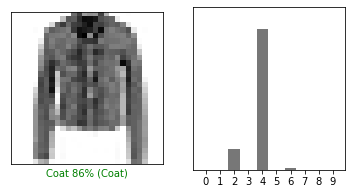

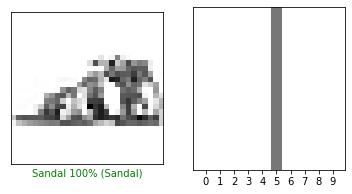

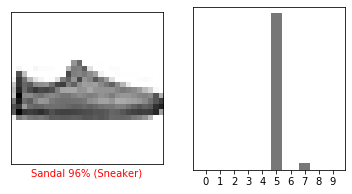

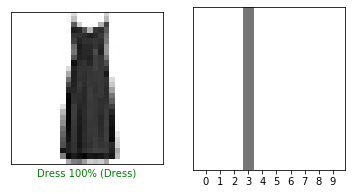

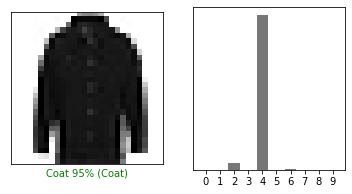

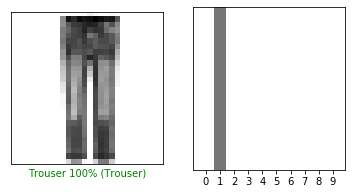

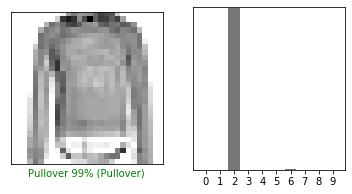

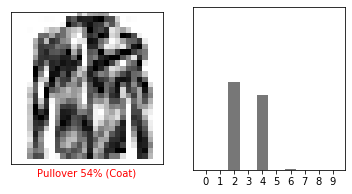

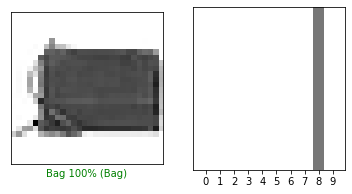

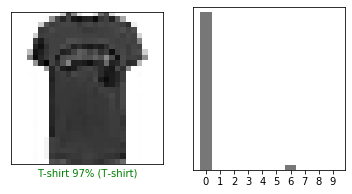

In [79]:
for i in range(10,20):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plt.xticks([])
  plt.yticks([])
  predicted = np.max(preds[i])
  label = classes[np.argmax(preds[i])]
  plt.xlabel("{} {:2.0f}% ({})".format(label,
                                  100*predicted,
                                  classes[y_test[i]]),
                                  color= "green" if classes[y_test[i]] == label else "red")
  plt.imshow(X_test[i], cmap=plt.cm.binary)
  plt.subplot(1,2,2)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), preds[i], color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(preds[i])
  plt.show()